In [14]:
import pandas as pd
import numpy as np


def load_housing_data(path='/home/datadrive/PythonDev/DeepLearningPython/MLWithScikitLearnAndTensorFlow/Data/housing.csv'):
    return pd.read_csv(path)

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
# To ensure fair distribution between training and test sets 
# to avoiding the risk of introducing significant sampling bias
# Use stratified sampling (where data is divided into 

# Say the median income is a very important attribute to predict median housing prices.
# We may need to ensure the test set is representative of the the various 
# categories of income in the whole dataset.
# Since Median income in the dataset is a continuous numerical attribute. We will need to
# first crete an Income category attribute.

# looking at the Median income histogram, most median income values 
# are clustered around 2-5(tens of thousands of dollars). Some going beyond 6a.

# Don't have too many strata and each stratum should be large enough. 

# Lets create income category attribute.
# divide median income by 1.5 to limit number of categories. 
# Then merge all categories > 5 into category 5

housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

In [16]:
# Stratify based on the new income category
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [21]:
# peek and see what we got
housing['income_cat'].value_counts() / len(housing) * 100
# compare this with the output against random sampling
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5.0
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN,4.0
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN,3.0
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND,3.0
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND,3.0
20552,-121.80,38.68,11.0,3851.0,892.0,1847.0,747.0,3.4331,120600.0,INLAND,3.0
19989,-119.32,36.19,11.0,1281.0,291.0,861.0,313.0,1.0962,72300.0,INLAND,1.0
17049,-122.26,37.46,26.0,5067.0,750.0,1996.0,728.0,7.0001,500001.0,NEAR OCEAN,5.0
13692,-117.24,34.13,26.0,3774.0,716.0,1913.0,620.0,3.3534,98900.0,INLAND,3.0
13916,-116.15,34.14,18.0,3312.0,705.0,1251.0,512.0,3.0139,82600.0,INLAND,3.0


In [22]:
# remove the income_cat attribute so the data is back i it's original 
# state. we have the train and test set.
for aset in (strat_train_set, strat_test_set):
    aset.drop(['income_cat'], axis=1, inplace=True)

In [24]:
# lets visualize our data.
housing_copy = strat_train_set.copy()

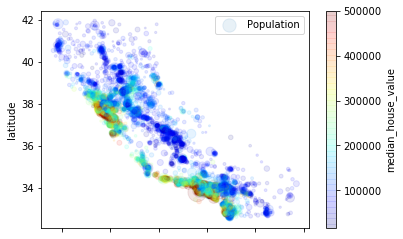

In [36]:
# %matplotlib inline
import matplotlib.pyplot as plt
housing_copy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, s=housing['population']/100, label='Population', 
                  c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()